# Projet de machine learning utilisant le dataset de bank marketing d'une banque portuguaise.
## On va utiliser les modeles de classification pour predire si un client va souscrire ou non à une offre bancaire via marketing direct (appel telphonique)

## Setup libraries

In [202]:
import pandas as pd
import numpy as np
import matplotlib as mp

from sklearn.model_selection import train_test_split
from sklearn.impute  import SimpleImputer
from sklearn.preprocessing  import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, precision_score, f1_score, recall_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier


from sklearn.linear_model import LogisticRegression
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [203]:
bank_file_path = "input/bank-additional-full.csv"
bank_data = pd.read_csv(bank_file_path, sep=";")

print(bank_data.head())
#print(bank_data.describe())
#print(bank_data.info())
bank_data.shape

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

(41188, 21)

In [204]:
bank_file_path = "input/bank-additional-full.csv"
bank_data = pd.read_csv(bank_file_path, sep=";")



In [205]:
def read_file(path):
    bank_data = pd.read_csv(bank_file_path, sep=";")
    return bank_data

bank_file_path = "input/bank-additional-full.csv"
bank_data  = read_file(bank_file_path)
#print(bank_data.dtypes)
#print(bank_data.shape)
bank_data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Extraire les données d'entrainement des données de tests


In [206]:
bank_data["nr.employed"].value_counts()
#print(nbr_class)

#bank_data.dtypes


nr.employed
5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: count, dtype: int64

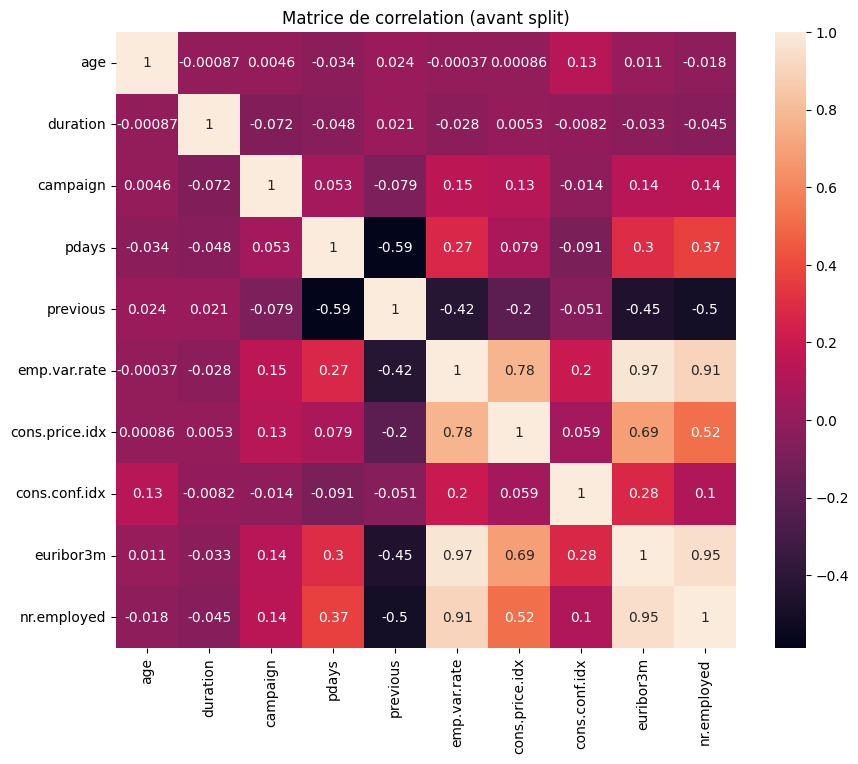

In [207]:
# Visualisation
num_total_cols = [col for col in bank_data.columns if bank_data[col].dtype in ['int64', 'float64']]
cor_bank_data = bank_data[num_total_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(cor_bank_data, annot=True)
plt.title('Matrice de correlation (avant split)')
plt.show()

In [208]:
# Encoder la cible en 0/1 (ex : "non" = 0, "oui" = 1)
#bank_data['y_encoded'] = bank_data['y'].map({'no': 0, 'yes': 1})

#num_total_cols_encoded = num_total_cols + ['y_encoded']

#cor_with_target = bank_data[num_total_cols_encoded].corr()['y_encoded'].sort_values(ascending=False)
#print(cor_with_target)

#plt.figure(figsize=(10,8))
#sns.heatmap(bank_data[num_total_cols_encoded].corr(), annot=True)
#plt.title('Matrice de correlation (avant split)')
#plt.show()


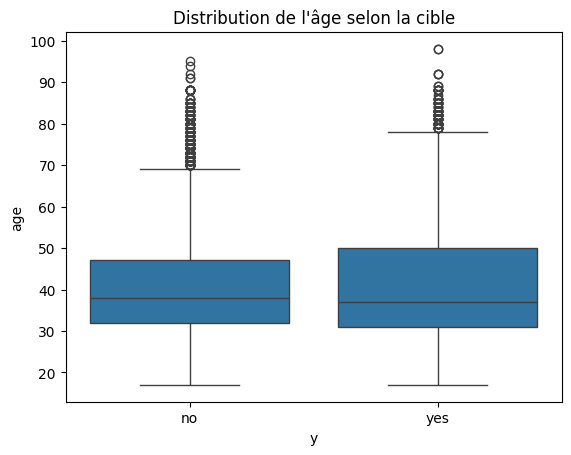

In [209]:

sns.boxplot(x='y', y='age', data=bank_data)
plt.title("Distribution de l'âge selon la cible")
plt.show()


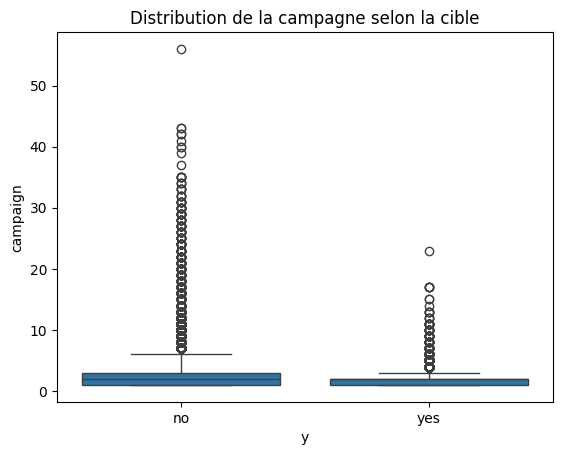

In [210]:
sns.boxplot(x='y', y='campaign', data=bank_data)
plt.title("Distribution de la campagne selon la cible")
plt.show()

In [211]:
# A supprimer : emp.var.rate, nr.employed
# A garder euribor3m
X = bank_data.drop(["y"], axis=1)
#y = bank_data['y']

features_cat_cols = [col for col in X.columns if X[col].dtype in ['str']]
print(features_cat_cols)
#print(X[feaures_cat_cols])

#X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=0)

print(X["job"].nunique())
print(X["marital"].nunique())

#dict = {col: value for col, value in features_cat_cols, X[features_cat_cols].nunique()}
cardinality_dict = X[features_cat_cols].nunique().to_dict()

print(dict)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
12
4
<class 'dict'>


In [212]:
#num_cols = [col for col in X_train.columns if X_train[col].dtype in ['int64', 'float64']]
#num_cols = X_train.select_dtypes(include=['int64', 'float64'])
#cat_cols = [col for col in X_train.columns if X_train[col].dtype in ['str']]
#cat_cols = X_train.select_dtypes(include=['str'])
#print(num_cols)
#print(cat_cols)
#print(X_train[num_cols].head())

#print(X['job'].value_counts())

bank_data[['default']].groupby(['default']).value_counts()
bank_data[['housing']].groupby(['housing']).value_counts()
bank_data[['loan']].groupby(['loan']).value_counts()
#bank_data[['job']].groupby(['job']).value_counts()
bank_data[['y']].groupby(['y']).value_counts()
bank_data[['poutcome','y']].groupby(['poutcome']).value_counts()

poutcome     y  
failure      no      3647
             yes      605
nonexistent  no     32422
             yes     3141
success      yes      894
             no       479
Name: count, dtype: int64

In [213]:
# Scaling des variables numériques
y = bank_data['y']
X = bank_data.drop(['duration','y'], axis=1)
X.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


## Train Test Split

In [214]:

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, stratify = y, random_state=0)

print(X_train.shape)
print(X_valid.shape)

print(y_train.value_counts())
print(y_valid.value_counts())

(32950, 19)
(8238, 19)
y
no     29238
yes     3712
Name: count, dtype: int64
y
no     7310
yes     928
Name: count, dtype: int64


## Pipeline

In [215]:
num_cols = [col for col in X_train.columns if X_train[col].dtype in ['int64', 'float64']]

cat_cols = [col for col in X_train.columns if X_train[col].dtype in ['str']]

print(num_cols)
print(cat_cols)

['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


In [216]:
# Importer & Scaler

num_imputer = SimpleImputer(strategy='median')
num_scaler = StandardScaler()

transfo_num = Pipeline(steps=[('imputation',num_imputer)
,('standard', num_scaler)])

cat_imputer = SimpleImputer(strategy='most_frequent')
onehot = OneHotEncoder(handle_unknown='ignore')

transfo_cat = Pipeline(steps=[('imputation',cat_imputer),
                              ('onehot', onehot)])

preparation = ColumnTransformer(
    transformers=[
        ('num', transfo_num , num_cols),
        ('cat', transfo_cat , cat_cols)])

In [217]:
#transformed_X_train = preparation.fit_transform(X_train)

#transformed_X_valid = preparation.transform(X_valid)
#print(transformed_X_train.shape)
#print(transformed_X_valid.shape)

## Modele baseline (arbre de  decision)

In [218]:
modele_arbre = Pipeline(steps=[('preparation', preparation),
                      ('model', DecisionTreeClassifier())])

modele_arbre.fit(X_train, y_train)

y_pred_arbre = modele_arbre.predict(X_valid)



## Evaluation baseline

In [219]:
report = classification_report(y_valid,y_pred_arbre)

print(report)

cm_arbre = confusion_matrix(y_valid, y_pred_arbre)
print(cm_arbre)

              precision    recall  f1-score   support

          no       0.91      0.91      0.91      7310
         yes       0.31      0.33      0.32       928

    accuracy                           0.84      8238
   macro avg       0.61      0.62      0.61      8238
weighted avg       0.85      0.84      0.84      8238

[[6627  683]
 [ 624  304]]


In [220]:
# Evaluation
modele_reg_lin = Pipeline(steps=[('preparation', preparation),
                      ('model', LogisticRegression(max_iter=100, class_weight="balanced"))])

## Model Logistic regression

In [221]:
modele_reg_lin = Pipeline(steps=[('preparation', preparation),
                      ('model', LogisticRegression(max_iter=100, class_weight="balanced"))])

modele_reg_lin.fit(X_train, y_train)

y_pred = modele_reg_lin.predict(X_valid)



In [222]:
#Evaluation

#print(y_valid)
y_valid_bin = y_valid.map({"no": 0, "yes":1})
#print(y_valid_bin)
#repyort = classification_report(y_valid_bin,y_pred.map({"no": 0, "yes":1}))

#print(report)

cm = confusion_matrix(y_valid, y_pred)
#print(cm)


# changing threshold and predicting

#print(y_pred_new_threshold)

# Variation seuil
print("Seuil à 0.3")
y_pred_new_threshold = (modele_reg_lin.predict_proba(X_valid)[:, 1] >= 0.3).astype(int)
print("Precision:", precision_score(y_valid_bin, y_pred_new_threshold))
print("Recall:", recall_score(y_valid_bin, y_pred_new_threshold))
print("F1 score:", f1_score(y_valid_bin, y_pred_new_threshold))

print("Seuil à 0.4")
y_pred_new_threshold = (modele_reg_lin.predict_proba(X_valid)[:, 1] >= 0.4).astype(int)
print("Precision:", precision_score(y_valid_bin, y_pred_new_threshold))
print("Recall:", recall_score(y_valid_bin, y_pred_new_threshold))
print("F1 score:", f1_score(y_valid_bin, y_pred_new_threshold))

print("Seuil à 0.5")
y_pred_new_threshold = (modele_reg_lin.predict_proba(X_valid)[:, 1] >= 0.5).astype(int)
print("Precision:", precision_score(y_valid_bin, y_pred_new_threshold))
print("Recall:", recall_score(y_valid_bin, y_pred_new_threshold))
print("F1 score:", f1_score(y_valid_bin, y_pred_new_threshold))

print("Seuil à 0.6")
y_pred_new_threshold = (modele_reg_lin.predict_proba(X_valid)[:, 1] >= 0.6).astype(int)
print("Precision:", precision_score(y_valid_bin, y_pred_new_threshold))
print("Recall:", recall_score(y_valid_bin, y_pred_new_threshold))
print("F1 score:", f1_score(y_valid_bin, y_pred_new_threshold))


print("RAUC score:", roc_auc_score(y_valid_bin, y_pred_new_threshold))

Seuil à 0.3
Precision: 0.16894305526371087
Recall: 0.8663793103448276
F1 score: 0.2827501318797257
Seuil à 0.4
Precision: 0.26161858974358976
Recall: 0.7036637931034483
F1 score: 0.3814252336448598
Seuil à 0.5
Precision: 0.35223160434258144
Recall: 0.6293103448275862
F1 score: 0.45166279969064194
Seuil à 0.6
Precision: 0.396011396011396
Recall: 0.5991379310344828
F1 score: 0.47684391080617494
RAUC score: 0.7415662295391292


## Random Forest model

In [223]:
forest_arbre = Pipeline(steps=[('preparation', preparation),
                      ('model', RandomForestClassifier())])

forest_arbre.fit(X_train, y_train)

y_pred_forest = forest_arbre.predict(X_valid)

In [224]:
#Evaluation

report = classification_report(y_valid,y_pred_forest)

print(report)

cm = confusion_matrix(y_valid, y_pred_forest)
print(cm)


              precision    recall  f1-score   support

          no       0.91      0.97      0.94      7310
         yes       0.51      0.28      0.36       928

    accuracy                           0.89      8238
   macro avg       0.71      0.62      0.65      8238
weighted avg       0.87      0.89      0.87      8238

[[7059  251]
 [ 667  261]]


## Gradient boosting

In [225]:
boost = Pipeline(steps=[('preparation', preparation),
                      ('model', HistGradientBoostingClassifier())])

boost.fit(X_train, y_train)

y_pred_boost = boost.predict(X_valid)

In [226]:
report = classification_report(y_valid,y_pred_boost)

print(report)

cm = confusion_matrix(y_valid, y_pred_boost)
print(cm)

              precision    recall  f1-score   support

          no       0.91      0.98      0.95      7310
         yes       0.64      0.25      0.36       928

    accuracy                           0.90      8238
   macro avg       0.78      0.62      0.65      8238
weighted avg       0.88      0.90      0.88      8238

[[7179  131]
 [ 696  232]]
